In [1]:

from src.config import Config
from src.data.big_query_loader import BigQueryLoader


parameters = {"study_start_date": ("STRING", Config.STUDY_START_DATE)}
daily_metrics = BigQueryLoader.load_data(
    query_file="daily_metrics.sql", query_parameters_map=parameters
)

assignment_activity = BigQueryLoader.load_data(
    query_file="assignment_activity.sql", parquet_file="assignment_activity"
)

LOADING FROM SOURCE .... 
DATA EXIST, IS LOADING FROM LOCAL ...


In [2]:
from src.data.feature_extraction import get_total_daily_features, get_treatment_daily_features
import warnings

warnings.filterwarnings("ignore")

daily_metrics = get_total_daily_features(daily_metrics, assignment_activity)
treatment_daily_metrics = daily_metrics[
    daily_metrics["activity_date"] >= Config.EXPERIMENT_START_DATE
]
treatment_daily_metrics.set_index("activity_date", inplace=True)
daily_metrics.set_index("activity_date", inplace=True)


treatment_daily_metrics = get_treatment_daily_features(treatment_daily_metrics)


## Active Player

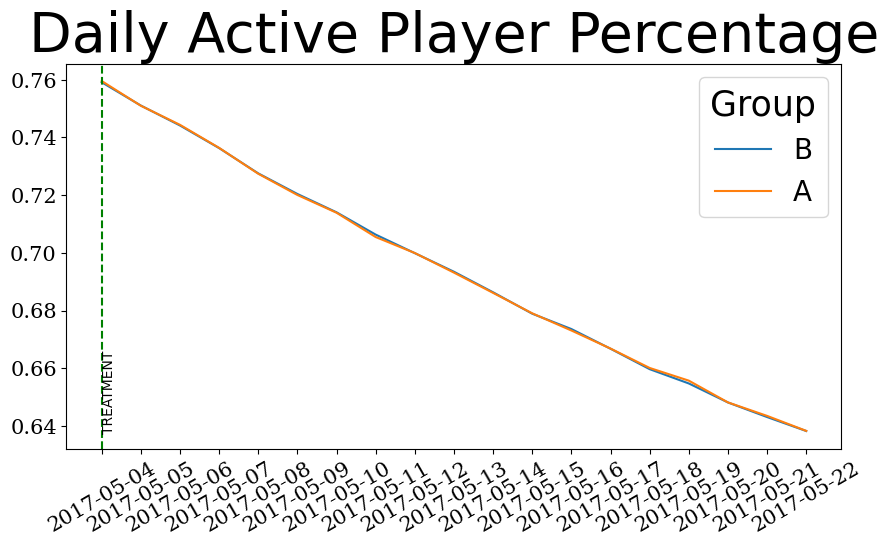

In [3]:
from src.utility.plot import plot_daily_trend

plot_daily_trend(
    "daily_active_player_percentage",
    treatment_daily_metrics,
    title="Daily Active Player Percentage",
)

## Conversion Rate

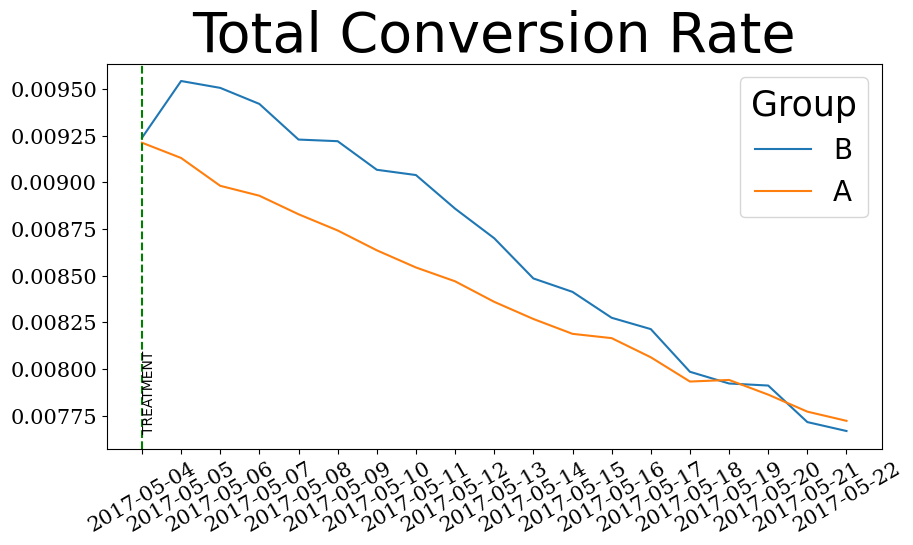

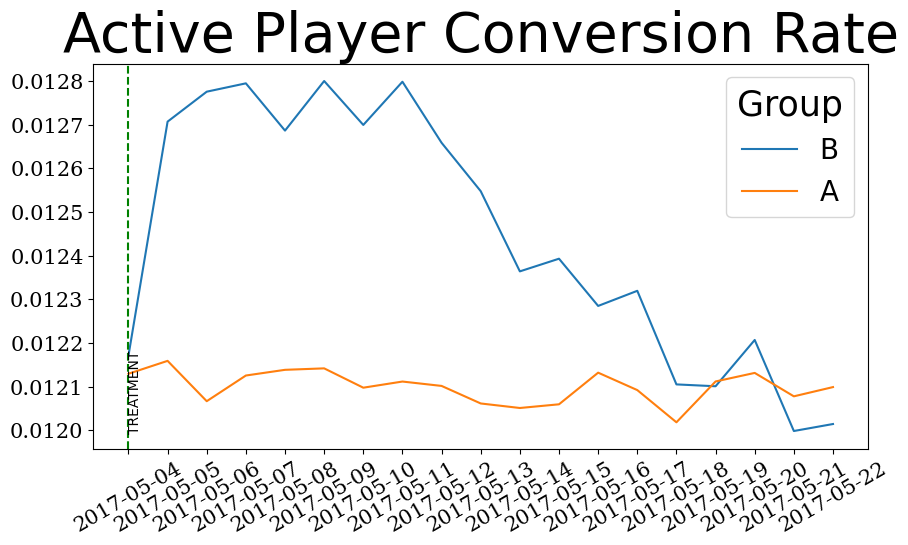

In [4]:
plot_daily_trend(
    "total_conversion_rate", treatment_daily_metrics, title="Total Conversion Rate"
)

plot_daily_trend(
    "active_player_conversion_rate",
    treatment_daily_metrics,
    title="Active Player Conversion Rate",
)

## Revenue

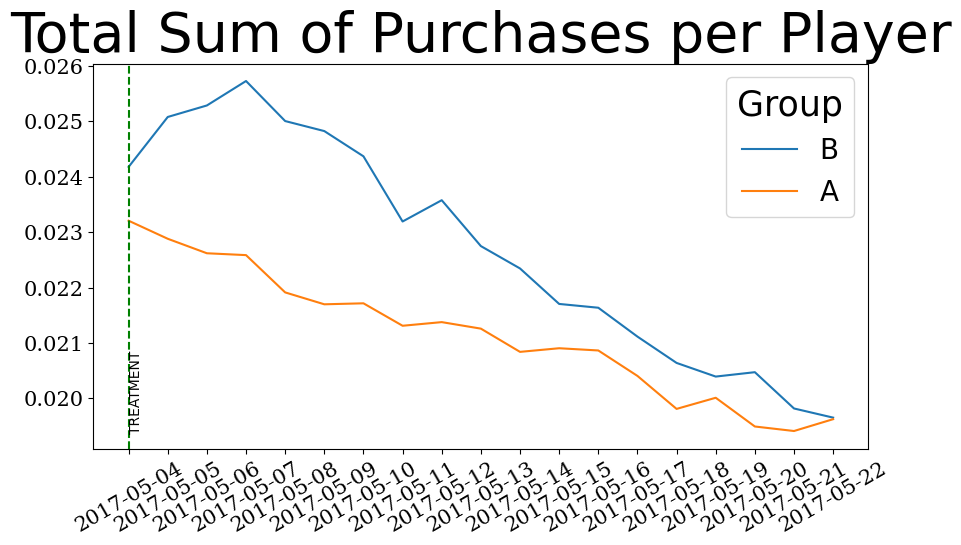

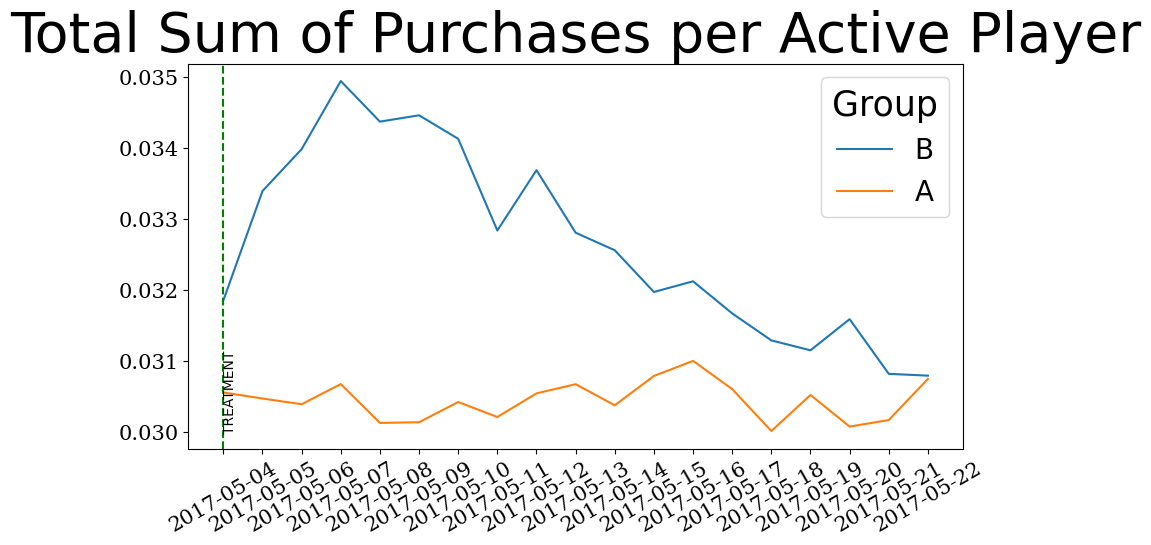

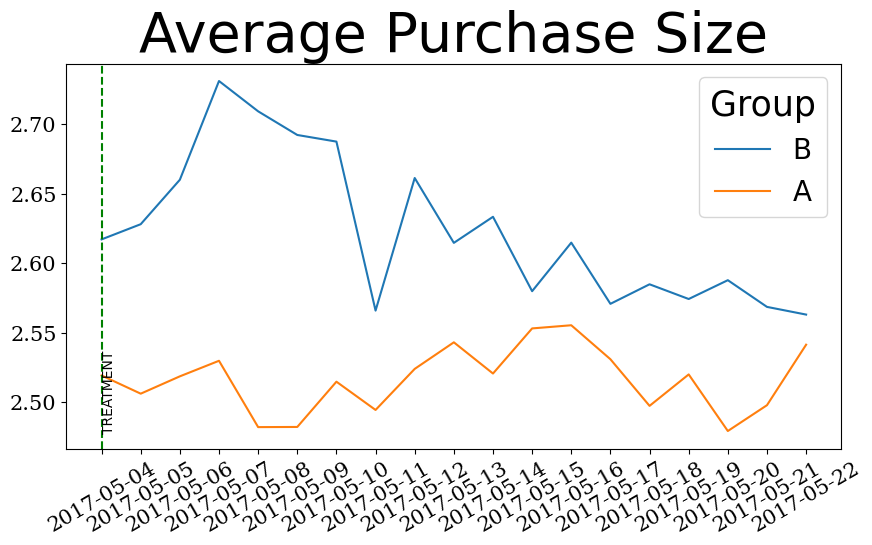

In [5]:

plot_daily_trend(
    "total_sum_purchase_per_player",
    treatment_daily_metrics,
    title="Total Sum of Purchases per Player",
)

plot_daily_trend(
    "total_sum_purchase_per_active_player",
    treatment_daily_metrics,
    title="Total Sum of Purchases per Active Player",
)

plot_daily_trend(
    "average_purchase_size", treatment_daily_metrics, title="Average Purchase Size"
)

## Engagement

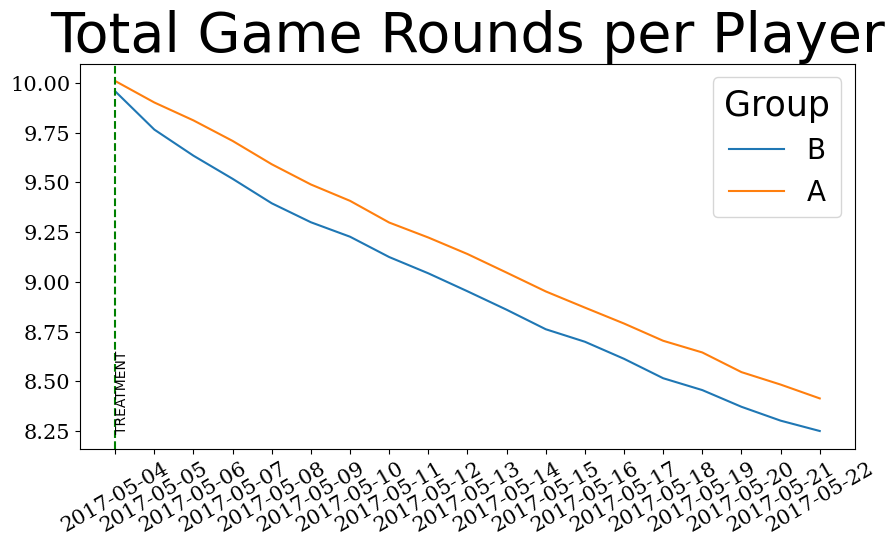

In [6]:
plot_daily_trend(
    "total_game_rounds_per_player",
    treatment_daily_metrics,
    title="Total Game Rounds per Player",
)


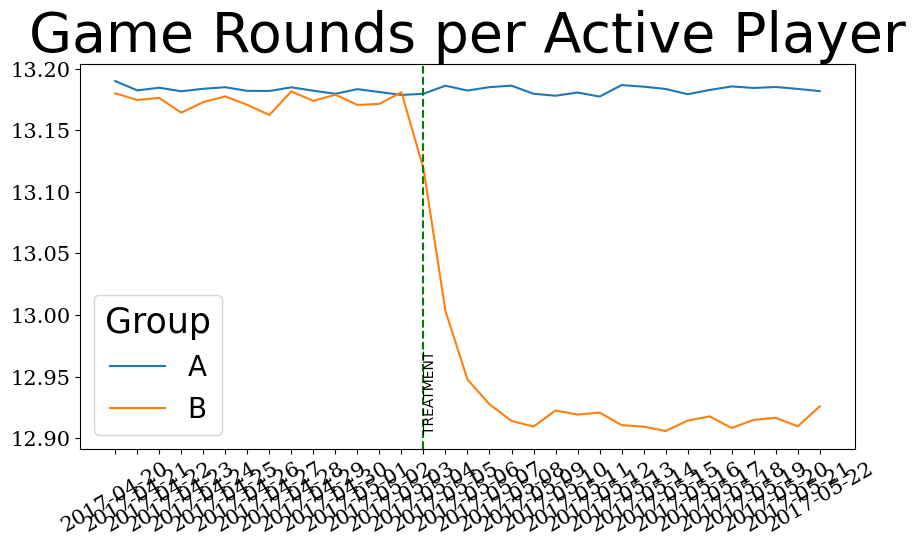

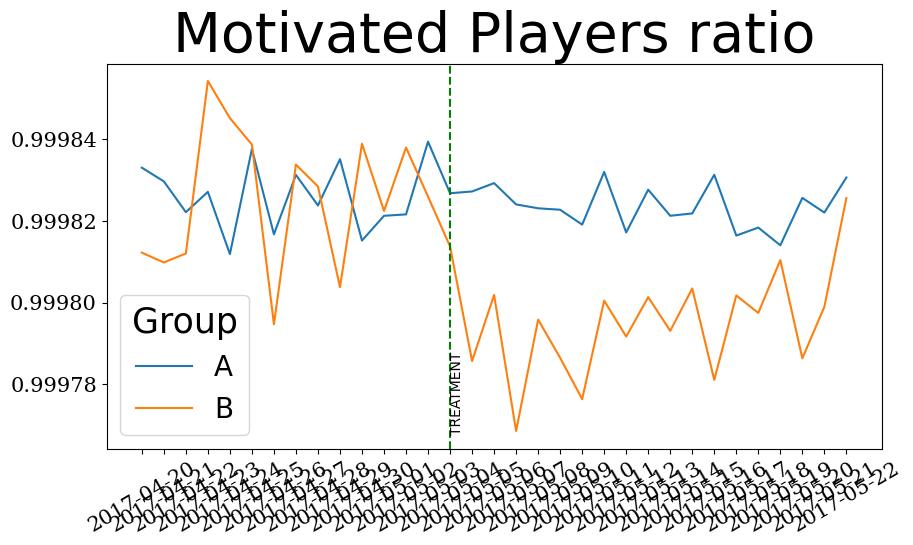

In [7]:
daily_metrics["game_rounds_per_active_player"] = (
    daily_metrics.total_game_rounds / daily_metrics.daily_active_player
)
daily_metrics["motivated_players_ratio"] = (
    daily_metrics.total_motivated_players / daily_metrics.daily_active_player
)



plot_daily_trend(
    "game_rounds_per_active_player",
    daily_metrics,
    title="Game Rounds per Active Player",
)

plot_daily_trend(
    "motivated_players_ratio", daily_metrics, title="Motivated Players ratio"
)